In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

## Simple Linear Regression

In [2]:
from sklearn.datasets import load_boston

boston_raw = load_boston()
boston = pd.DataFrame(data=boston_raw['data'], columns=boston_raw['feature_names'])
boston['MEDV'] = boston_raw['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
boston_ols = smf.ols('MEDV ~ LSTAT', boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           5.08e-88
Time:                        14:12:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
print('Parameters: \n{}\n'.format(boston_ols.params))

Parameters: 
Intercept    34.553841
LSTAT        -0.950049
dtype: float64



In [6]:
boston_conf_int = boston_ols.conf_int(alpha=0.05)
boston_conf_int.columns=['5%', '95%']
print('Confidence Intervals:\n{}'.format(boston_conf_int))

Confidence Intervals:
                  5%        95%
Intercept  33.448457  35.659225
LSTAT      -1.026148  -0.873951


In [7]:
boston_ols.predict(pd.DataFrame({'LSTAT': [5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

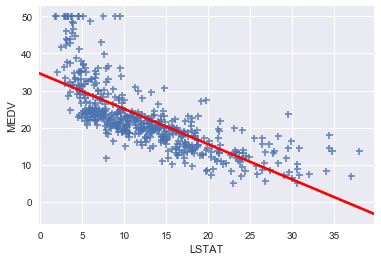

In [8]:
sns.regplot(x=boston['LSTAT'], y=boston['MEDV'], ci=False, 
            line_kws={'color': 'red'}, marker='+')

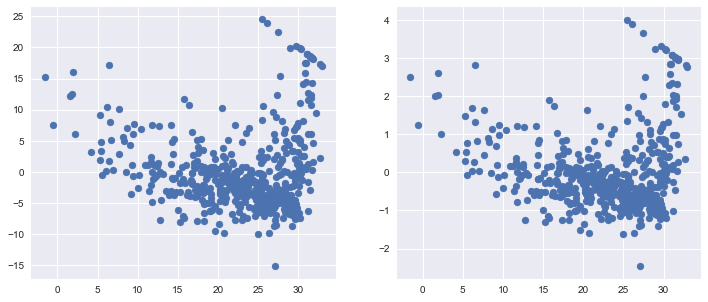

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(boston_ols.predict(), boston_ols.resid)
ax2.scatter(boston_ols.predict(), boston_ols.outlier_test()['student_resid'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


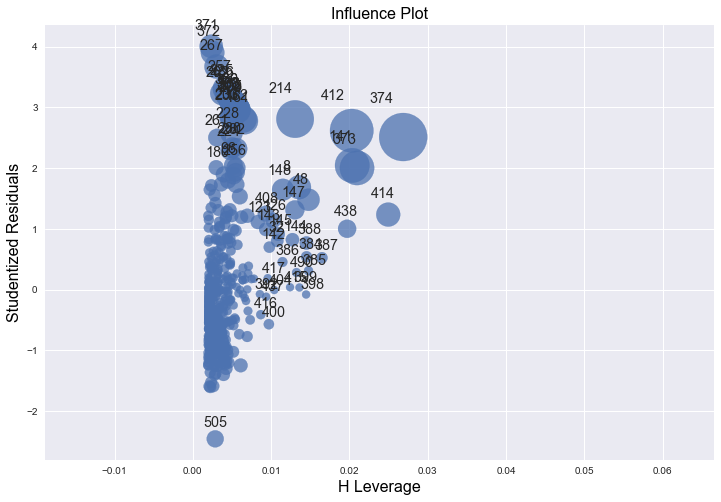

In [10]:
import statsmodels.api as sm
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ip = sm.graphics.influence_plot(boston_ols, ax=ax)

## Multiple Linear Regression

In [11]:
boston_ols = smf.ols('MEDV ~ LSTAT + AGE', boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           2.98e-88
Time:                        14:12:30   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#there is no analogy to 'MEDV ~ .' in statsmodels
#but it's easy to create the string of all column names excluding MEDV
#' + '.join(boston.columns[:-1])
boston_ols = smf.ols('MEDV ~ {}'.format(' + '.join(boston.columns[:-1])), boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        14:12:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#need to scale the variables
boston_scaled = boston.copy()
for c in boston_scaled.columns[:-1]:
    boston_scaled[c] = boston_scaled[c] - boston_scaled[c].mean()
X = boston_scaled[boston_scaled.columns[:-1]].values
vars = boston_scaled.columns[:-1]
for i in range(X.shape[1]):
    print('VIF {}: {:.4f}'.format(vars[i], vif(X, i)))

VIF CRIM: 1.7733
VIF ZN: 2.2986
VIF INDUS: 3.9912
VIF CHAS: 1.0739
VIF NOX: 4.3951
VIF RM: 1.9342
VIF AGE: 3.1009
VIF DIS: 3.9566
VIF RAD: 7.4805
VIF TAX: 9.0085
VIF PTRATIO: 1.7992
VIF B: 1.3458
VIF LSTAT: 2.9381


In [14]:
#need to take out 'AGE'
boston_ols = smf.ols('MEDV ~ {}'.format(' + '.join(boston.columns[:-1])), boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        14:12:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction Terms

In [15]:
boston_ols = smf.ols('MEDV ~ LSTAT * AGE', boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           4.86e-88
Time:                        14:12:30   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of the Predictors

In [16]:
boston_ols = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.56e-112
Time:                        14:12:30   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
boston_ols1 = smf.ols('MEDV ~ LSTAT', boston).fit()
boston_ols2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston).fit()
sm.stats.anova_lm(boston_ols1, boston_ols2)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


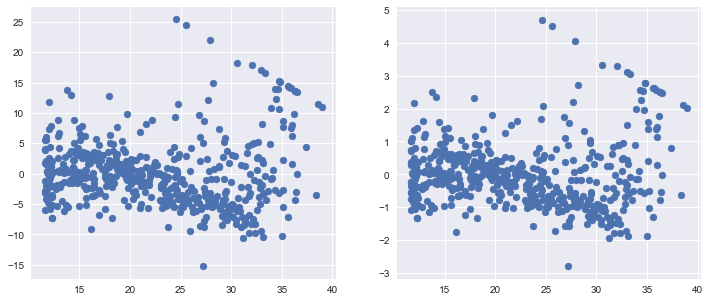

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(boston_ols2.predict(), boston_ols2.resid)
ax2.scatter(boston_ols2.predict(), boston_ols2.outlier_test()['student_resid'])

In [37]:
#this is a replicate of the poly() function in R
def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

boston_ols = smf.ols('MEDV ~ poly(LSTAT, 5)', boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          8.73e-122
Time:                        14:54:54   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5328      0.232     97.197      0.000      22.077      22.988
poly(LSTAT, 5)[0]  -152.4595      5.215    -29.236      0.000    -162.705    -142.214
poly(LSTAT, 5)[1]   -64.2272      5.215    -12.316      0.000     -74.473     -53.982
poly(LSTAT, 5)[2]   -27.0511      5.215     -5.187      0.000     -37.297     -16.805
poly(LSTAT, 5)[3]    25.4517      5.215      4.881      0.000      15.206      35.697
poly(LSTAT, 5)[4]    19.2524      5.215      3.692      0.000       9.007      29.498
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
boston_ols = smf.ols('MEDV ~ np.log(RM)', boston).fit()
boston_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           1.22e-64
Time:                        14:55:53   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(RM)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Qualitative Predictors

In [41]:
carseats = pd.read_csv('../data/Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [45]:
carseat_ols = smf.ols('Sales ~ {} + Income:Advertising + Price:Age' \
                      .format(' + '.join(carseats.columns[1:])), carseats) \
                      .fit()
carseat_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          6.14e-166
Time:                        15:00:29   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
from patsy.contrasts import Treatment

levels = carseats['ShelveLoc'].unique().tolist()
contrast = Treatment(reference=0).code_without_intercept(levels)
for i in range(len(levels)):
    print(levels[i], contrast.matrix[i, :])

Bad [ 0.  0.]
Good [ 1.  0.]
Medium [ 0.  1.]


In [1]:
#this is dumb
def load_libraries():
    import pandas
    import numpy 
    print('The libraries have been loaded')

load_libraries()

The libraries have been loaded
